Кобзарь О.С. Хабибуллин Р.А. 

# Поверхностное натяжение на границе "нефть-газ" и "вода-газ"

Источник: Справочник инженера-нефтяника. Том 1. Введение в нефтяной инжиниринг. 

Повехностное натяжение - это сила, которая поддерживает целостость поверхности отдельной фазы; как правило, единицей измерения служит дин/см (или мН/м). Поверхностное натяжение зависит от давления, температуры и состава каждой фазы. Применяемые корреляции можно разделить на 2 типа: использующие псевдокомпозиционный подход и эмпирические зависимости. 

В свою очередь поверхностное натяжение  "нефть-газ" можно классифицировать по границам "дегазированная нефть - газ" и "насыщенная нефть - газ"

В uniflocpy реализованы эмпирические корреляции Бейкера и Свердлоффа (1955 г.) и Абдул-Маджида (2000 г.) для границы "насыщенная нефть - газ " и Саттона (2006 г. ) для границы "вода-газ"


In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
import uniflocpy.uPVT.PVT_fluids as PVT_fluids
%matplotlib inline

In [2]:
import uniflocpy.uTools.uconst as uc

In [3]:
def show_example(legend, title, xlabel, ylabel):
    plt.grid(True)
    plt.title(title, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xlabel(xlabel, color='black')
    plt.legend(legend)
    plt.show()

In [4]:
gamma_oil_example = 0.8
rsb_m3m3_example = 200
t_c = 80
t_K = t_c + 273.15
list_p_bar = range(1, 172,5)
fluid_Standing = PVT_fluids.FluidStanding(gamma_oil = gamma_oil_example, rsb_m3m3 = rsb_m3m3_example)
surface_tension_BS, surface_tension_AM = [], []
for i in list_p_bar:
    fluid_Standing.calc(i, t_c)
    surface_tension_BS.append(PVTcorr.unf_surface_tension_go_Abdul_Majeed_Nm(t_K, gamma_oil_example, 
                                                                                  fluid_Standing.rs_m3m3))
    surface_tension_AM.append(PVTcorr.unf_surface_tension_go_Baker_Swerdloff_Nm(t_K, gamma_oil_example,
                                                                                     i / 10))

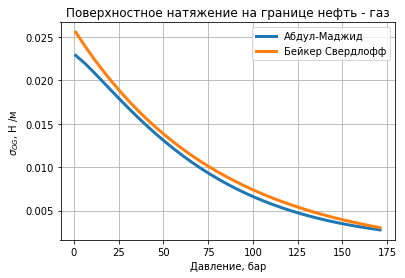

In [5]:
plt.plot(list_p_bar, surface_tension_BS, linewidth=3)
plt.plot(list_p_bar, surface_tension_AM, linewidth=3)

show_example(('Абдул-Маджид', 'Бейкер Свердлофф'),'Поверхностное натяжение на границе нефть - газ', 
             'Давление, бар', '$\sigma_{OG}$, Н /м ' )

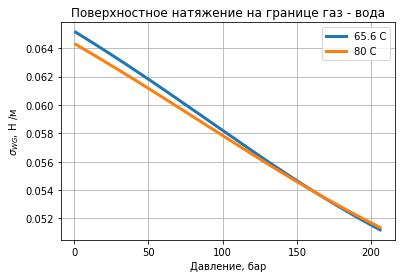

In [6]:
gamma_oil_example = 0.85
gamma_gas_example = 0.65
rsb_m3m3_example = 200
t_c = 65.6
t_c2 = 80
list_p_bar = range(1, 207)
fluid_Standing = PVT_fluids.FluidStanding(gamma_oil = gamma_oil_example, rsb_m3m3 = rsb_m3m3_example, 
                                         gamma_gas = gamma_gas_example)

surface_tension_St , surface_tension_St3= [], []

for i in list_p_bar:
    fluid_Standing.calc(i, t_c)
    surface_tension_St.append(PVTcorr.unf_surface_tension_gw_Sutton_Nm(fluid_Standing.rho_wat_kgm3, 
                                                                       fluid_Standing.rho_gas_kgm3, t_c)) 
    fluid_Standing.calc(i, t_c2)
    surface_tension_St3.append(PVTcorr.unf_surface_tension_gw_Sutton_Nm(fluid_Standing.rho_wat_kgm3, 
                                                                       fluid_Standing.rho_gas_kgm3, t_c))
plt.plot(list_p_bar, surface_tension_St, linewidth=3)
plt.plot(list_p_bar, surface_tension_St3, linewidth=3)
show_example((str(t_c) + ' C', str(t_c2) + ' C'),'Поверхностное натяжение на границе газ - вода', 
             'Давление, бар', '$\sigma_{WG}$, Н /м ' ) 